<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/03-linear-regression/1_linear_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression Fundamentals

Linear regression algorithm consists of repeating a step in which we move a line closer to a point. We can do this using rotations and translations of **Linear Algebra Transformation** techniques.


##Setup

In [1]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_3_Linear_Regression/utils.py

--2022-03-17 06:06:23--  https://github.com/luisguiserrano/manning/raw/master/Chapter_3_Linear_Regression/utils.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_3_Linear_Regression/utils.py [following]
--2022-03-17 06:06:23--  https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_3_Linear_Regression/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 467 [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]     467  --.-KB/s    in 0s      

2022-03-17 06:06:23 (31.2 MB/s) - ‘utils.py’ saved [467/467]



In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
from utils import *

##Synthetic dataset

In [3]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


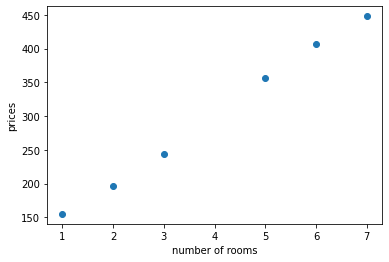

In [4]:
plot_points(features, labels)

We have to predict the price of house having rooms 4.

##The square trick

It is a much more clever way of moving our line closer
to one of the points.

The square trick will bring these four cases down to one by finding
values with the correct signs `(+ or –)` to add to the slope and the y-intercept for the line to always move closer to the point.

In [5]:
def square_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
  """
  b=base_price
  m=price_per_room
  x=num_rooms
  """
  # Calculates the prediction
  predicted_price = base_price + price_per_room * num_rooms
  # Translates the line
  base_price  += learning_rate * (actual_price - predicted_price)
  # Rotates the line
  price_per_room += learning_rate * num_rooms * (actual_price - predicted_price)
  
  return price_per_room, base_price

##The absolute trick

It is another useful trick to move the line closer to the points.

This is an intermediate between the simple and the square tricks.

In [6]:
def absolute_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate):
  """
  b=base_price
  m=price_per_room
  x=num_rooms
  """
  # Calculates the prediction
  predicted_price = base_price + price_per_room * num_rooms
  if actual_price > predicted_price:
    # Translates the line
    price_per_room += learning_rate * num_rooms
    base_price  += learning_rate
  else:
    # # Rotates the line
    price_per_room -= learning_rate * num_rooms
    base_price  -= learning_rate
  
  return price_per_room, base_price

##The linear regression algorithm

**We will repeat the absolute or square trick
many times to move the line closer to the points.**

This algorithm takes as input a bunch of points and returns a line that fits them well. This algorithm
consists of starting with random values for our slope and our y-intercept and then repeating
the procedure of updating them many times using the absolute or the square trick.

Each iteration of the loop is called an epoch, and we set this number at the beginning of our
algorithm.

In real life, we use the absolute or square trick, which works a lot better.
In fact, although both are commonly used, the square trick is more popular.



In [7]:
def linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=1):
  # Generates random values for the slope and the y-intercept
  price_per_room = random.random()
  base_price = random.random()

  for epoch in range(epochs):
    if epoch == progress:
      draw_line(price_per_room, base_price, starting=0, ending=8)
    
    # Picks a random point on our dataset
    i = random.randint(0, len(features) - 1)
    num_rooms = features[i]
    actual_price = labels[i]

    # Applies the square trick to move the line closer to our point
    price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, actual_price, learning_rate=learning_rate)

  draw_line(price_per_room, base_price, "black", starting=0, ending=8)
  plot_points(features, labels)

  print(f"Price per room: {price_per_room}")
  print(f"Base price: {base_price}")

  return price_per_room, base_price

Price per room: 51.141946679048566
Base price: 92.48293754379947


(51.141946679048566, 92.48293754379947)

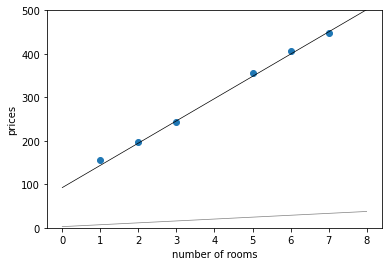

In [8]:
plt.ylim(0, 500)

linear_regression(features, labels, learning_rate=0.01, epochs=1000)

Price per room: 52.699522091898515
Base price: 90.21109693670151


(52.699522091898515, 90.21109693670151)

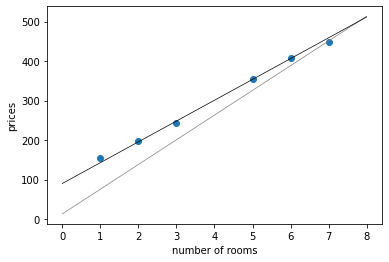

In [9]:
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=10)

Price per room: 52.35975183179472
Base price: 90.27656013268746


(52.35975183179472, 90.27656013268746)

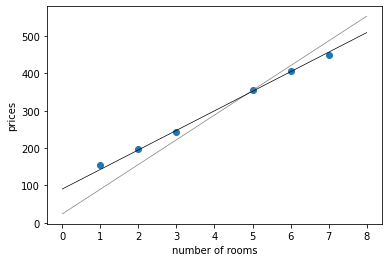

In [10]:
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=50)

Price per room: 52.41542235425802
Base price: 90.52091700133771


(52.41542235425802, 90.52091700133771)

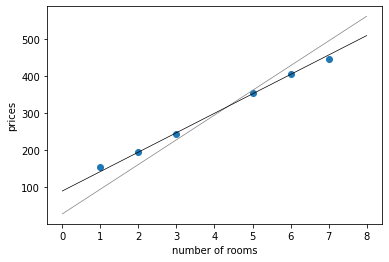

In [11]:
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=100)

Price per room: 52.8763593717025
Base price: 89.68923639973791


(52.8763593717025, 89.68923639973791)

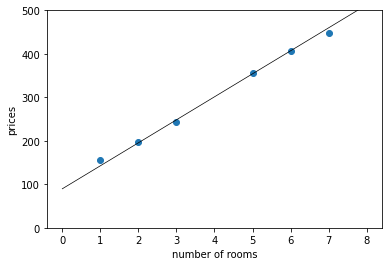

In [12]:
plt.ylim(0, 500)
linear_regression(features, labels, learning_rate=0.01, epochs=1000, progress=1000)

##Using the model to make predictions

Now that we have a shiny linear regression model, we can use it to make predictions!

we ran the algorithm and obtained a slope (price per room) of 52.25 and a
y-intercept (base price of the house) of 88.61. 

Thus, the equation follows:

In [13]:
r = 4
p = 52.24 * r + 88.61

The prediction the model makes for a house with r = 4 rooms is

In [14]:
p

297.57

Note that `$297.57` is not far from the `$300`.

##The error function

However, many times using a direct approach is difficult to solve problems in machine learning.

A more indirect, yet more mechanical, way to do this is using error functions. An error function is a metric that tells us how our model is doing.

Error functions are also sometimes called loss functions or cost
functions on the literature.

We
have two common ways to do this called the absolute error and the square error. 

In short, the absolute error is the sum of vertical distances from the line to the points in the dataset, and the
square error is the sum of the squares of these distances.

**The absolute error: A metric that tells us how good our model is
by adding distances**

The absolute error is the sum of the distances between the data points and the line.

To calculate each of the distances, we take the difference between the
label and the predicted label. This difference can be positive or negative depending on whether
the point is above or below the line. To turn this difference into a number that is always positive,
we take its absolute value.

**The square error: A metric that tells us how good our model
is by adding squares of distances**

The square error is very similar to the absolute error, except instead of taking the absolute value
of the difference between the label and the predicted label, we take the square.

This always turns
the number into a positive number, because squaring a number always makes it positive.

The square error is used more commonly in practice than the absolute
error. Why? A square has a much nicer derivative than an absolute value, which comes in handy
during the training process.

**Mean absolute and (root) mean square errors are more common in real life**

However, in
practice, the mean absolute error and the mean square error are used much more commonly.
These are defined in a similar way, except instead of calculating sums, we calculate averages.
Thus, the mean absolute error is the average of the vertical distances from the points to the line,
and the mean square error is the average of the squares of these same distances.

Another error commonly used is the root mean square error, or RMSE
for short. As the name implies, this is defined as the root of the mean square error. It is used to match
the units in the problem and also to give us a better idea of how much error the model makes in a
prediction.

**Gradient descent: How to decrease an error function by slowly descending
from a mountain**

We are using `The square trick` and `The absolute trick` in the training
process.

Every time we “move a
small amount in this direction,” we are calculating in the background a derivative of the error
function and using it to give us a direction in which to move our line.

We want to find the line that best fits our data. We have a metric called the error function, which
tells us how far a line is from the data. Thus, if we could just reduce this number as much as possible,
we would find the best line fit. This process, common in many areas in mathematics, is
called minimizing functions, that is, finding the smallest possible value that a function can return.
This is where gradient descent comes in: it is a great way to minimize a function.

The code for calculating the RMSE follows:

In [15]:
def rmse(labels, predictions):
  n = len(labels)
  differences = np.subtract(labels, predictions)
  return np.sqrt(1.0 / n * (np.dot(differences, differences)))

> we used the dot product, which is an easy way
to write a sum of products of corresponding terms in two vectors.



Let's plot the error function.

In [16]:
def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
  # Generates random values for the slope and the y-intercept
  price_per_room = random.random()
  base_price = random.random()
  errors = []

  for epoch in range(epochs):
    # make prediction
    predictions = features[0] * price_per_room + base_price
    # calculate error
    errors.append(rmse(labels, predictions))
    
    # Picks a random point on our dataset
    i = random.randint(0, len(features) - 1)
    num_rooms = features[i]
    actual_price = labels[i]

    # Applies the square trick to move the line closer to our point
    price_per_room, base_price = square_trick(base_price, 
                                              price_per_room, 
                                              num_rooms, 
                                              actual_price, 
                                              learning_rate=learning_rate)

  draw_line(price_per_room, base_price, "black", starting=0, ending=9)
  plot_points(features, labels)

  print(f"Price per room: {price_per_room}")
  print(f"Base price: {base_price}")
  plt.show()
  plt.scatter(range(len(errors)), errors)
  plt.show()
  
  return price_per_room, base_price

Price per room: 52.67716723558409
Base price: 89.8803156463345


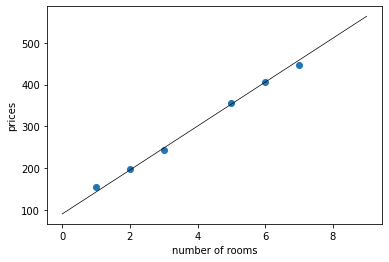

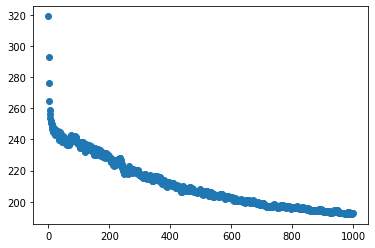

(52.67716723558409, 89.8803156463345)

In [17]:
linear_regression(features, labels, learning_rate=0.01, epochs=1000)

##Training with gradient descent

The reality is that we can train models by iterating on one point at a time or on the entire
dataset. However, when the datasets are very big, both options may be expensive. We can practice
mini-batch learning,
a useful method called
which consists of dividing our data into many mini
batches.

In each iteration of the linear regression algorithm, we pick one of the mini-batches and
proceed to adjust the weights of the model to reduce the error in that mini-batch.

The decision
of using one point, a mini-batch of points, or the entire dataset on each iteration gives rise to
three general types of gradient descent algorithms.

* When we use one point at a time, it is called
stochastic gradient descent.

* When we use a mini-batch, it is called mini-batch gradient descent.

* When we use the entire dataset, it is called batch gradient descent.